# Cogs 13 Final project: Study on Patterns in On-campus Coffee Shop: How Students Utilize the Space of Starbucks at UCSD Price Center 

A small observation study done on the UCSD student body. 
See our analysis [here](https://docs.google.com/document/d/1hNBVV7kjjQAXdH89_LtDlm4LsZ37iX1VxdSdk3Sbdls/edit?tab=t.lpjsrncvgw2h). 

In [178]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

In [153]:
morning = pd.read_csv('morning.csv')
morning = morning.dropna(how='any',axis=0)
morning.columns= ['Date', 'Location', 'Weekday', 'Time of order called', 'Type of drink',
       'Caffeinated', 'Party Size', 'Linger time']
morning.head()

,Date,Location,Weekday,Time of order called,Type of drink,Caffeinated,Party Size,Linger time
0,2025/03/10,UCSD PC Starbucks,Monday,10:00,Cold Coffee,Yes,1.0,0.0
1,2025/03/10,UCSD PC Starbucks,Monday,10:02,Cold Tea,Yes,1.0,0.0
2,2025/03/10,UCSD PC Starbucks,Monday,10:04,Hot Coffee,Yes,1.0,0.0
3,2025/03/10,UCSD PC Starbucks,Monday,10:06,Cold Coffee,Yes,1.0,0.0
4,2025/03/10,UCSD PC Starbucks,Monday,10:08,Cold Coffee,Yes,2.0,2.0


In [189]:
def split_drinks(series):
    all_drinks = series.str.split(',').explode().str.strip()
    return all_drinks

def plot_drink_pie_chart_from_series(drink_series, time ):
    split_series = drink_series.str.split(',').explode().str.strip()
    drink_counts = split_series.value_counts()
    plt.figure(figsize=(5, 5))
    plt.pie(drink_counts, labels=drink_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Distribution of Drinks in the {time}')
    plt.axis('equal')  
    plt.show()


In [168]:
afternoon = pd.read_csv('afternoon.csv')
afternoon = afternoon.iloc[:, 0:8].dropna(how='any',axis=0)
afternoon.columns= ['Date', 'Location', 'Weekday', 'Time of order called', 'Type of drink',
       'Caffeinated', 'Party Size', 'Linger time']
afternoon.head()

,Date,Location,Weekday,Time of order called,Type of drink,Caffeinated,Party Size,Linger time
0,2025/03/10,UCSD PC Starbucks,Monday,13:59,"Cold Coffee, Frappuccino Blended Beverage",Yes,2.0,2.0
1,2025/03/10,UCSD PC Starbucks,Monday,14:00,"Cold Coffee, Frappuccino Blended Beverage",Yes,2.0,60.0
2,2025/03/10,UCSD PC Starbucks,Monday,14:01,Cold Coffee,Yes,1.0,0.0
3,2025/03/10,UCSD PC Starbucks,Monday,14:01,Cold Coffee,Yes,1.0,0.0
4,2025/03/10,UCSD PC Starbucks,Monday,14:03,"Refreshers, Frappuccino Blended Beverage",Yes,2.0,45.0


In [ ]:
afternoon.head()

,Date,Location,Weekday,Time of order called,Type of drink,Caffeinated,Party Size,Linger time
0,2025/03/10,UCSD PC Starbucks,Monday,13:59,"Cold Coffee, Frappuccino Blended Beverage",Yes,2.0,2.0
1,2025/03/10,UCSD PC Starbucks,Monday,14:00,"Cold Coffee, Frappuccino Blended Beverage",Yes,2.0,60.0
2,2025/03/10,UCSD PC Starbucks,Monday,14:01,Cold Coffee,Yes,1.0,0.0
3,2025/03/10,UCSD PC Starbucks,Monday,14:01,Cold Coffee,Yes,1.0,0.0
4,2025/03/10,UCSD PC Starbucks,Monday,14:03,"Refreshers, Frappuccino Blended Beverage",Yes,2.0,45.0


In [204]:
def plot_orders_distribution(df, name, time_column='Time of order called'):
    """
    Plots the distribution of the number of orders every 5 minutes.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing the order data.
    time_column (str): The name of the column containing the time of the order (default is 'Time of order').
    """
    df_copy = df.copy()
    df_copy[time_column] = pd.to_datetime(df_copy[time_column], format='%H:%M')
    df_copy['Time rounded'] = df_copy[time_column].dt.round('10min')
    
    # Convert time to string format HH:MM to remove unwanted date
    df_copy['Time rounded'] = df_copy['Time rounded'].dt.strftime('%H:%M')
    
    order_counts = df_copy['Time rounded'].value_counts().sort_index()
    order_counts_df = order_counts.reset_index()
    order_counts_df.columns = ['Time rounded', 'Order Count']
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Time rounded', y='Order Count', data=order_counts_df)
    
    plt.xticks(rotation=45)
    plt.title(f'Distribution of Orders Every 10 Minutes, {name}')
    plt.xlabel('Time (rounded to 10 minutes)')
    plt.ylabel('Number of Orders')
    plt.show()

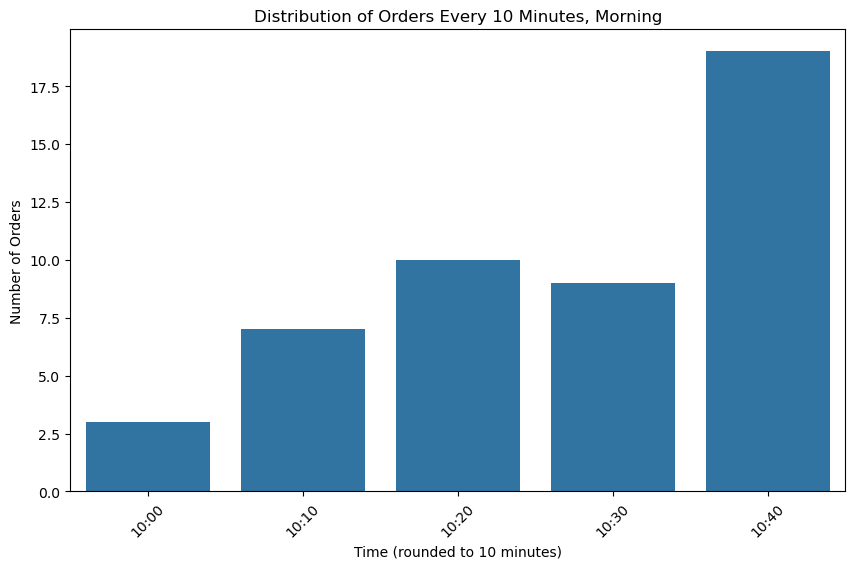

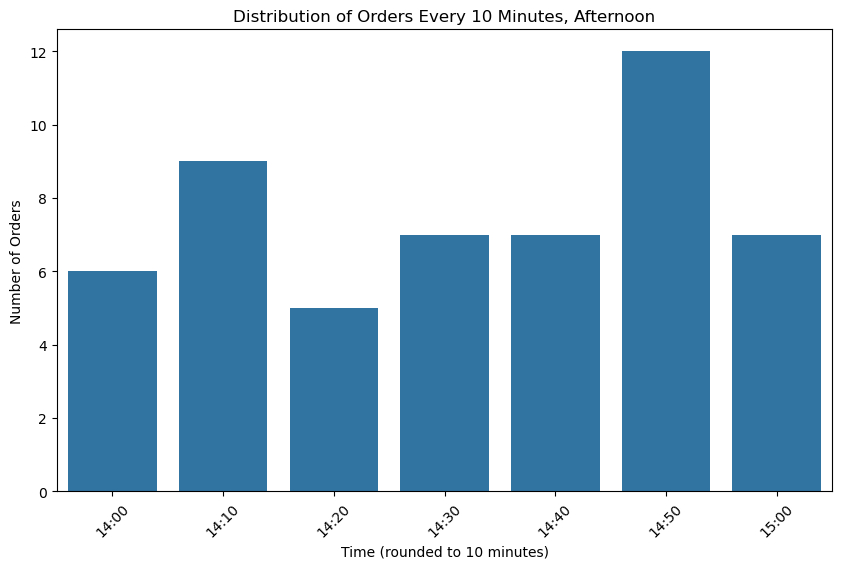

In [206]:
plot_orders_distribution(morning, 'Morning')
plot_orders_distribution(afternoon, 'Afternoon')


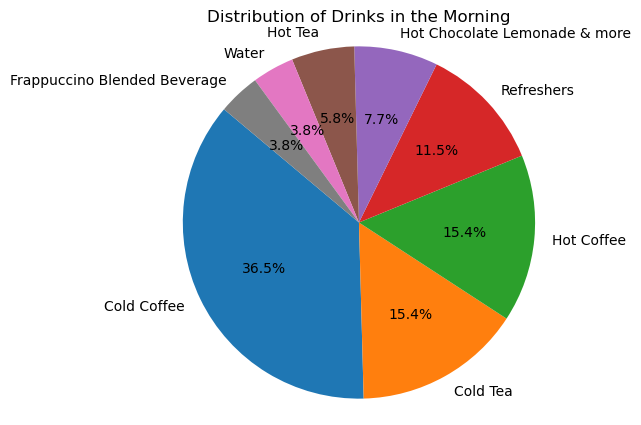

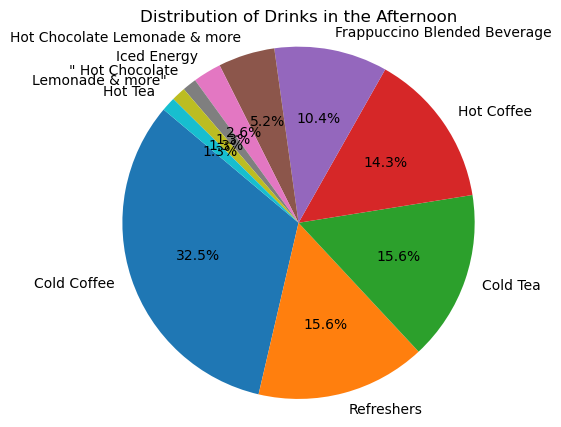

In [207]:
plot_drink_pie_chart_from_series(morning['Type of drink'], 'Morning')
plot_drink_pie_chart_from_series(afternoon['Type of drink'], 'Afternoon')

In [208]:
combined_df = pd.concat([morning, afternoon], ignore_index=True)
combined_df

,Date,Location,Weekday,Time of order called,Type of drink,Caffeinated,Party Size,Linger time
0,2025/03/10,UCSD PC Starbucks,Monday,10:00,Cold Coffee,Yes,1.0,0.0
1,2025/03/10,UCSD PC Starbucks,Monday,10:02,Cold Tea,Yes,1.0,0.0
2,2025/03/10,UCSD PC Starbucks,Monday,10:04,Hot Coffee,Yes,1.0,0.0
3,2025/03/10,UCSD PC Starbucks,Monday,10:06,Cold Coffee,Yes,1.0,0.0
4,2025/03/10,UCSD PC Starbucks,Monday,10:08,Cold Coffee,Yes,2.0,2.0
...,...,...,...,...,...,...,...,...
96,2025/03/10,UCSD PC Starbucks,Monday,14:56,Cold Coffee,Yes,1.0,0.0
97,2025/03/10,UCSD PC Starbucks,Monday,14:56,"Cold Tea, Refreshers",Yes,2.0,0.0
98,2025/03/10,UCSD PC Starbucks,Monday,14:58,Frappuccino Blended Beverage,Yes,1.0,0.0
99,2025/03/10,UCSD PC Starbucks,Monday,14:59,"Hot Coffee, Hot Tea",Yes,1.0,0.0


In [209]:
# Test hypothesis one: Bigger party sizes result in longer lingering time 

In [210]:
def plot_scatter_party_size_vs_linger_time(df, party_size_column='Party Size', linger_time_column='Linger time'):
    df[party_size_column] = df[party_size_column].astype(int)
    plt.figure(figsize=(5, 4))
    sns.scatterplot(x=party_size_column, y=linger_time_column, data=df)
    plt.title('Relationship Between Party Size and Linger Time')
    plt.xlabel('Party Size')
    plt.ylabel('Linger Time')
    max_party_size = df[party_size_column].max()
    plt.xticks(np.arange(1, max_party_size + 1, step=1))
    plt.grid(False)
    plt.grid(True)
    plt.show()


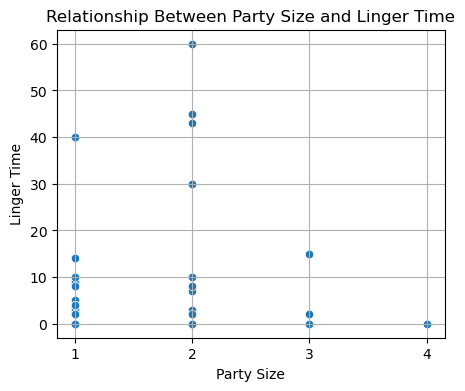

In [211]:
plot_scatter_party_size_vs_linger_time(combined_df)

In [212]:
def calculate_correlation(df, party_size_column='Party Size', linger_time_column='Linger time'):
    df[party_size_column] = df[party_size_column].astype(int)
    correlation = df[[party_size_column, linger_time_column]].corr().iloc[0, 1]
    print(f"Pearson correlation coefficient between {party_size_column} and {linger_time_column}: {correlation:.4f}")
calculate_correlation(combined_df)


Pearson correlation coefficient between Party Size and Linger time: 0.2888


In [213]:
morning.head()

,Date,Location,Weekday,Time of order called,Type of drink,Caffeinated,Party Size,Linger time
0,2025/03/10,UCSD PC Starbucks,Monday,10:00,Cold Coffee,Yes,1.0,0.0
1,2025/03/10,UCSD PC Starbucks,Monday,10:02,Cold Tea,Yes,1.0,0.0
2,2025/03/10,UCSD PC Starbucks,Monday,10:04,Hot Coffee,Yes,1.0,0.0
3,2025/03/10,UCSD PC Starbucks,Monday,10:06,Cold Coffee,Yes,1.0,0.0
4,2025/03/10,UCSD PC Starbucks,Monday,10:08,Cold Coffee,Yes,2.0,2.0


In [216]:
def plot_caffeinated_distribution(df, df_name):
    caffeine_counts = df['Caffeinated'].value_counts()

    # Plot a pie chart
    plt.figure(figsize=(3, 3))
    plt.pie(caffeine_counts, labels=caffeine_counts.index, autopct='%1.1f%%', colors=['#ff9999', '#66b3ff'])
    plt.title(f'Caffeinated vs Non-Caffeinated Drinks in the {df_name}')
    plt.show()

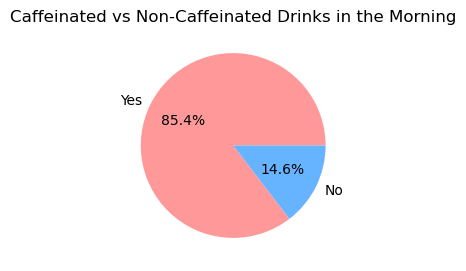

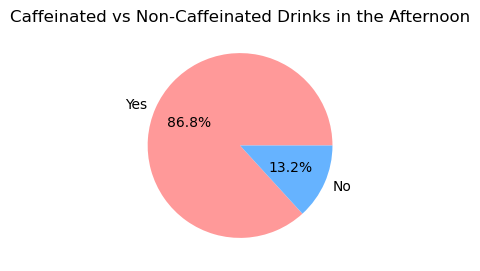

In [217]:
plot_caffeinated_distribution(morning, df_name='Morning')
plot_caffeinated_distribution(afternoon, df_name='Afternoon')